**What are the patterns in customer feedback and preferences (Identifying clusters of products based on customer reviews)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

reviews_250 = pd.read_csv("/content/drive/MyDrive/INFOSYS723/INFOSYS723_Project/Data/reviews_0-250.csv")

<ipython-input-2-6cd3d5c2a9c0>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_250 = pd.read_csv("/content/drive/MyDrive/INFOSYS723/INFOSYS723_Project/Data/reviews_0-250.csv")


In [ ]:
review_files = [
    '/content/drive/MyDrive/INFOSYS723/INFOSYS723_Project/Data/reviews_0-250.csv',
    '/content/drive/MyDrive/INFOSYS723/INFOSYS723_Project/Data/reviews_250-500.csv',
    '/content/drive/MyDrive/INFOSYS723/INFOSYS723_Project/Data/reviews_500-750.csv',
    '/content/drive/MyDrive/INFOSYS723/INFOSYS723_Project/Data/reviews_750-1250.csv',
     '/content/drive/MyDrive/INFOSYS723/INFOSYS723_Project/Data/reviews_1250-end.csv'
]

In [ ]:
reviews_df = pd.concat([pd.read_csv(file) for file in review_files], ignore_index=True)

<ipython-input-4-0d4ed9c4f3a7>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.concat([pd.read_csv(file) for file in review_files], ignore_index=True)
<ipython-input-4-0d4ed9c4f3a7>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.concat([pd.read_csv(file) for file in review_files], ignore_index=True)
<ipython-input-4-0d4ed9c4f3a7>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.concat([pd.read_csv(file) for file in review_files], ignore_index=True)


In [ ]:
reviews_df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
reviews_df=reviews_df.drop('Unnamed: 0', axis=1)

In [ ]:
reviews_df = reviews_df.dropna()

In [ ]:
reviews_df.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
5,42802569154,4,1.0,1.000000,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
6,6941883808,2,0.0,0.250000,8,6,2,2023-03-19,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
8,7656791726,5,1.0,1.000000,1,0,1,2023-03-18,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
9,38727834382,5,1.0,1.000000,2,0,2,2023-03-18,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
21,46007186639,1,0.0,0.727273,11,3,8,2023-03-14,Just like Aquaphor just get something cheaper...,Overrated!,fair,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294722 entries, 5 to 1094377
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   author_id                 294722 non-null  object 
 1   rating                    294722 non-null  int64  
 2   is_recommended            294722 non-null  float64
 3   helpfulness               294722 non-null  float64
 4   total_feedback_count      294722 non-null  int64  
 5   total_neg_feedback_count  294722 non-null  int64  
 6   total_pos_feedback_count  294722 non-null  int64  
 7   submission_time           294722 non-null  object 
 8   review_text               294722 non-null  object 
 9   review_title              294722 non-null  object 
 10  skin_tone                 294722 non-null  object 
 11  eye_color                 294722 non-null  object 
 12  skin_type                 294722 non-null  object 
 13  hair_color                294722 non-null  

In [ ]:
relevant_columns = ['rating', 'is_recommended', 'helpfulness', 'review_text', 'review_title',
                    'skin_tone', 'eye_color', 'skin_type', 'hair_color',
                    'product_id', 'product_name', 'brand_name', 'price_usd']

df_relevant = reviews_df[relevant_columns]

In [ ]:
df_relevant.head()

,rating,is_recommended,helpfulness,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
5,4,1.0,1.000000,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
6,2,0.0,0.250000,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
8,5,1.0,1.000000,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
9,5,1.0,1.000000,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
21,1,0.0,0.727273,Just like Aquaphor just get something cheaper...,Overrated!,fair,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
df_relevant['sentiment'] = df_relevant['rating'].apply(lambda x: 'positive' if x in [3, 4, 5] else 'negative')

<ipython-input-12-4a12c9611911>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['sentiment'] = df_relevant['rating'].apply(lambda x: 'positive' if x in [3, 4, 5] else 'negative')


In [ ]:
df_relevant.head()

,rating,is_recommended,helpfulness,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,sentiment
5,4,1.0,1.000000,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive
6,2,0.0,0.250000,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,negative
8,5,1.0,1.000000,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive
9,5,1.0,1.000000,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive
21,1,0.0,0.727273,Just like Aquaphor just get something cheaper...,Overrated!,fair,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,negative


In [ ]:
df_relevant.describe()

,rating,is_recommended,helpfulness,price_usd
count,294722.000000,294722.000000,294722.000000,294722.000000
mean,4.047455,0.758922,0.774697,46.798594
std,1.382949,0.427738,0.309350,41.100678
min,1.000000,0.000000,0.000000,3.000000
25%,3.000000,1.000000,0.666667,22.000000
50%,5.000000,1.000000,0.928571,38.000000
75%,5.000000,1.000000,1.000000,60.000000
max,5.000000,1.000000,1.000000,1900.000000


In [ ]:
df_relevant.isnull().sum()

rating            0
is_recommended    0
helpfulness       0
review_text       0
review_title      0
skin_tone         0
eye_color         0
skin_type         0
hair_color        0
product_id        0
product_name      0
brand_name        0
price_usd         0
sentiment         0
dtype: int64

In [ ]:
df_relevant.replace('None', pd.NA, inplace=True)

<ipython-input-16-8e1bded02a8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant.replace('None', pd.NA, inplace=True)


In [ ]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294722 entries, 5 to 1094377
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rating          294722 non-null  int64  
 1   is_recommended  294722 non-null  float64
 2   helpfulness     294722 non-null  float64
 3   review_text     294722 non-null  object 
 4   review_title    294722 non-null  object 
 5   skin_tone       294722 non-null  object 
 6   eye_color       294722 non-null  object 
 7   skin_type       294722 non-null  object 
 8   hair_color      294722 non-null  object 
 9   product_id      294722 non-null  object 
 10  product_name    294722 non-null  object 
 11  brand_name      294722 non-null  object 
 12  price_usd       294722 non-null  float64
 13  sentiment       294722 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 33.7+ MB


In [ ]:
#Top5 mentioned companies in reviews in general
top_selling_companies = df_relevant['brand_name'].value_counts().nlargest(10).index.tolist()
top_selling_companies

['The Ordinary',
 'Tatcha',
 'Drunk Elephant',
 'Glow Recipe',
 'Youth To The People',
 'The INKEY List',
 'Farmacy',
 'LANEIGE',
 'Supergoop!',
 'fresh']

In [ ]:
#Company sentiment overall
company_sentiment = df_relevant.groupby('brand_name')['sentiment'].value_counts().unstack(fill_value=0)
company_sentiment['overall_sentiment_score'] = company_sentiment['positive'] - company_sentiment['negative']

In [ ]:
# Top-selling companies for positive reviews
top_positive_companies = company_sentiment[company_sentiment['overall_sentiment_score'] > 0].nlargest(5, 'overall_sentiment_score').index.tolist()
top_positive_companies

['The Ordinary',
 'Tatcha',
 'Glow Recipe',
 'Youth To The People',
 'Drunk Elephant']

In [ ]:
# Top-selling companies for negative reviews
top_negative_companies  = company_sentiment[company_sentiment['overall_sentiment_score'] < 0].nlargest(5, 'overall_sentiment_score').index.tolist()
top_negative_companies

['TWEEZERMAN']

**Clustering Analysis**

In [ ]:
import string
import re
import nltk
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwords = nltk.corpus.stopwords.words('english')
wn = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize text
    tokens = text.split()

    # Remove stopwords, lemmatize and drop words length < 2
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords and len(word) > 2]

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = preprocess_text, stop_words='english')
X = vectorizer.fit_transform(df_relevant['review_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 eye
 lip
 cream
 product
 balm
 love
 it’s
 like
 circle
 use
Cluster 1:
 skin
 product
 love
 face
 it’s
 use
 like
 feel
 using
 really


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


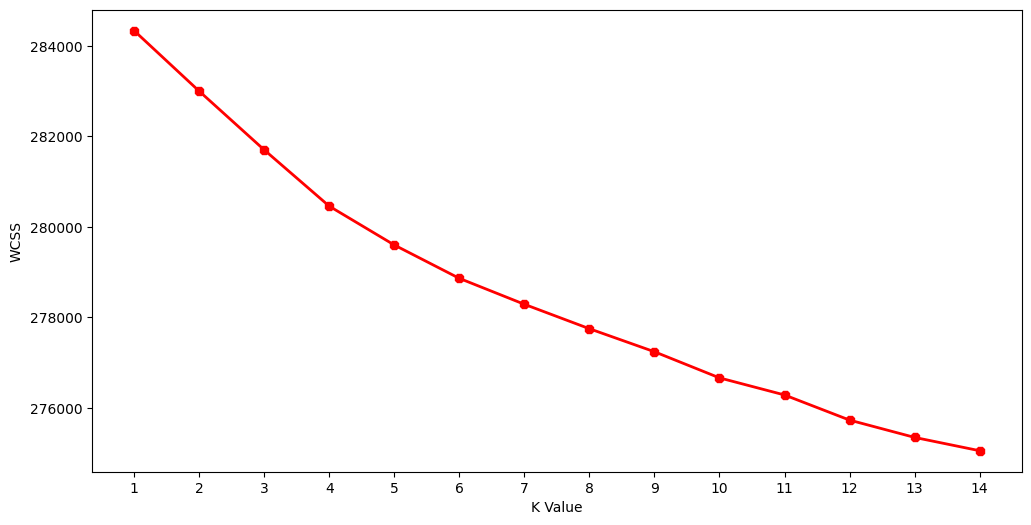

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# array to store WCSS values
wcss=[]

# loops from 1-10 as values of k
for i in range(1,15):
    # creates KMeans objects and fits the data
    km=KMeans(n_clusters=i)
    km.fit(X)
    # stores WCSS value
    wcss.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 lip
 balm
 mask
 love
 product
 it’s
 dry
 smell
 like
 feel
Cluster 1:
 product
 skin
 face
 it’s
 like
 use
 love
 using
 really
 smell
Cluster 2:
 eye
 cream
 circle
 product
 area
 dark
 around
 line
 love
 using
Cluster 3:
 skin
 feel
 product
 love
 dry
 use
 moisturizer
 face
 it’s
 like


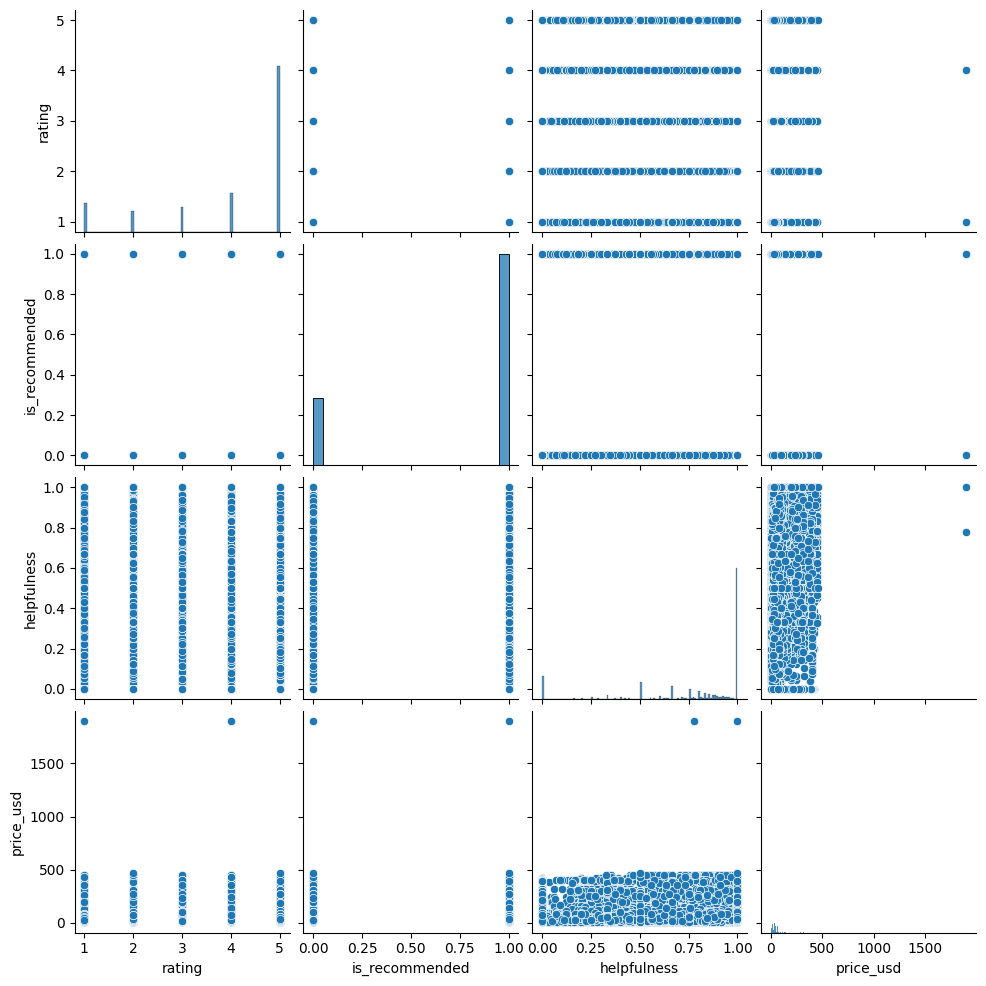

In [ ]:
import seaborn as sns

numerical_features = ['rating', 'is_recommended', 'helpfulness', 'price_usd']
sns.pairplot(data=df_relevant[numerical_features])

<ipython-input-24-c914d4e9a103>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_relevant.corr()


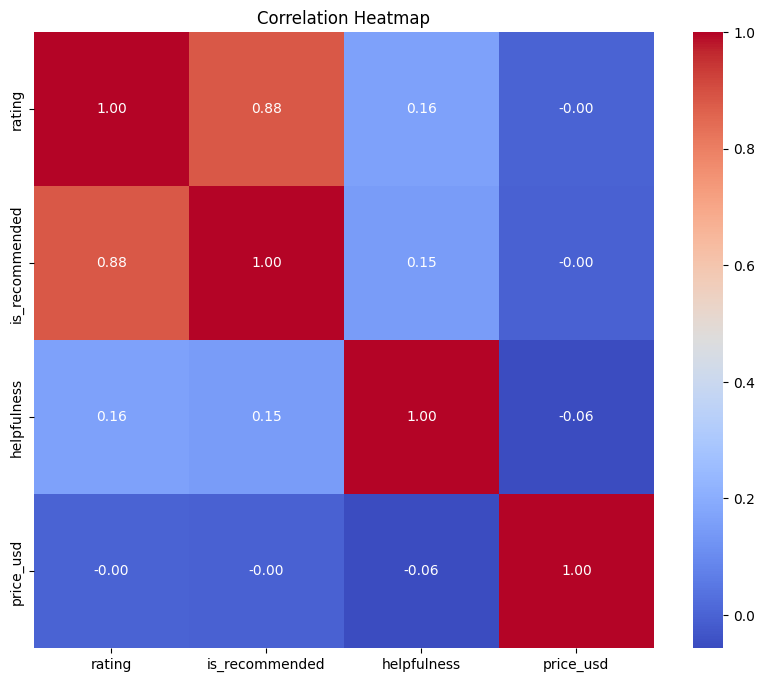

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_relevant.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = df_relevant.corr()
print(correlation_matrix)

                  rating  is_recommended  helpfulness  price_usd
rating          1.000000        0.883855     0.164313  -0.001467
is_recommended  0.883855        1.000000     0.148839  -0.003472
helpfulness     0.164313        0.148839     1.000000  -0.056893
price_usd      -0.001467       -0.003472    -0.056893   1.000000


<ipython-input-25-681d2017ece1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_relevant.corr()
